# Python Beginners Workshop - Day3

# Session 1: Pandas

## Learning Goals

- What is Pandas? and Why?
- loading data and Creating Pandas Series and DataFrame objects
- Data Manipulation (values, index, and columns)
- Data Selection (indexing, masking, and splitting)
- Data Transformation
- <font color="red">Dealing with missing data</font>
- Combinning DataFrames
- Split-Apply-Combine
- Saving Data 

What's missing:
- <font color="red">bin rows based on the value of one attribute (`pandas.cut`)</font>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Motivation

In [2]:
an_arr = np.arange(20).reshape(5, -1)
an_arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [3]:
pd.DataFrame(an_arr, 
             columns=['A', 'B', 'C', 'D'])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


## What is Pandas? And Why?

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It stores data in a tabular form. Each table, which is sometimes called a relation, in a relational database contains one or more data categories in columns, also called attributes. Each row, also called a record or tuple, contains a unique instance of data, or key, for the categories defined by the columns.

It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### Pandas Series

Pandas Series is a generalized of one-dimensional array with flexible indexing (one index per element in the column):

In [4]:
ss = pd.Series([1, 2, 3, 4])
ss

0    1
1    2
2    3
3    4
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [5]:
ss = pd.Series([25, 30, 33, 28], 
               index=['Mohammad', 'Nick', 'Hana', 'Anna'])
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

In [6]:
ss = pd.Series({'Mohammad': 25, 
                'Nick':30, 
                'Hana':33, 
                'Anna': 28})
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [7]:
ss['Mohammad']

25

In [8]:
ss[['Nick', 'Hana', 'Anna']]

Nick    30
Hana    33
Anna    28
dtype: int64

In [9]:
ss['Nick':'Anna']

Nick    30
Hana    33
Anna    28
dtype: int64

In [10]:
ss['Nick':'Anna':2]

Nick    30
Anna    28
dtype: int64

In [11]:
ss[[False, True, True, True]]

Nick    30
Hana    33
Anna    28
dtype: int64

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

### Pandas DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Pandas `DataFrame` is a generalization of two-dimensional array wit flexible indexing. We can create DataFrame directly from a dictionary, or from series:

In [12]:
age = {'Mohammad': 25, 'Nick':30, 'Hana':33, 'Anna': 28}
weight = {'Mohammad': 90, 'Nick': 80,'Hana': 50, 'Anna':55}

In [13]:
df = pd.DataFrame({'age': age, 'weight': weight})

In [14]:
df

,age,weight
Anna,28,55
Hana,33,50
Mohammad,25,90
Nick,30,80


In [15]:
df.index

Index(['Anna', 'Hana', 'Mohammad', 'Nick'], dtype='object')

In [16]:
df.columns

Index(['age', 'weight'], dtype='object')

### Other ways of creating Pandas DataFrame

Directly from a dictionary

In [17]:
df = pd.DataFrame({'age': [25, 30, 33, 28], 
                   'weight': [90, 80, 50, 55]})
df

,age,weight
0,25,90
1,30,80
2,33,50
3,28,55


In [18]:
df = pd.DataFrame({'age': [25, 30, 33, 28], 
                   'weight': [90, 80, 50, 55]}, 
                  index=['Mohammad', 'Nick', 'Hana', 'Anna'])
df

,age,weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


In [19]:
df = pd.DataFrame([[25, 90], 
                   [30, 80], 
                   [33, 50], 
                   [28, 55]], 
                  columns= ['Age', 'Weight'],
                  index=['Mohammad', 'Nick', 'Hana', 'Anna'])
df

,Age,Weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


### Import data from csv file

In [20]:
pd.read_csv("csv_sample.csv", index_col=0)

,A,B,C
D,1,4,7
E,2,5,8
F,3,6,9


### Import data from Exel sheet

**NOTE**: We need to install a library called `xlrd`.

In [21]:
pd.read_excel("excel_sample.xlsx")

,Unnamed: 0,A,B,C
0,D,1,4,7
1,E,2,5,8
2,F,3,6,9


### Import data from URL

<font color="red">
    Discuss with Nick about a reasonable data to direcctly import from the net and work on
</font> 

In [73]:
df = pd.read_csv("data/happiness17.csv", index_col=0)

In [74]:
df

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0.315964,2017
Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0.400770,2017
Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0.153527,2017
Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0.367007,2017
Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0.382612,2017
Netherlands,2.294804,1.503945,1.428939,0.585384,0.470490,6,7.377,0.810696,0.282662,2017
Canada,2.187264,1.479204,1.481349,0.611101,0.435540,7,7.316,0.834558,0.287372,2017
New Zealand,2.046456,1.405706,1.548195,0.614062,0.500005,8,7.314,0.816760,0.382817,2017
Sweden,2.097538,1.494387,1.478162,0.612924,0.385399,9,7.284,0.830875,0.384399,2017


## Writing Data to Files

In [76]:
new_df = pd.DataFrame({'A': [1, 2, 3, 4], 
                       'B': [5, 6, 7, 8]})

In [78]:
new_df.to_csv("hello.csv")

How do we make A/B the index of our csv file? (???)

In [79]:
# new_df.to_csv("hello.csv")

We have already seen `.index` as well as `.column`. However, Pandas provides some more handy methods for us to inspect our DataFrame:

---

### Exercise
1. Create a 20-by-3 pandas DataFrame using Numpy random module, and
2. Try out these commands to see what they return:
    - `data.head()`
    - `data.tail(3)`
    - `data.shape`

---

In [55]:
df.head(10)

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015
Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,0.14145,2015
Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,0.48357,2015
Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,0.36503,2015
Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,0.32957,2015
Finland,2.61955,1.29025,1.31826,0.64169,0.23351,6,7.406,0.88911,0.41372,2015
Netherlands,2.46570,1.32944,1.28017,0.61576,0.47610,7,7.378,0.89284,0.31814,2015
Sweden,2.37119,1.33171,1.28907,0.65980,0.36262,8,7.364,0.91087,0.43844,2015
New Zealand,2.26425,1.25018,1.31967,0.63938,0.47501,9,7.286,0.90837,0.42922,2015


In [56]:
df.tail(7)

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Guinea,1.552312,0.244550,0.791245,0.348588,0.264815,149,3.507,0.194129,0.110938,2017
Togo,1.837229,0.305445,0.431883,0.380426,0.196896,150,3.495,0.247106,0.095665,2017
Rwanda,0.540061,0.368746,0.945707,0.581844,0.252756,151,3.471,0.326425,0.455220,2017
Syria,1.061574,0.777153,0.396103,0.081539,0.493664,152,3.462,0.500533,0.151347,2017
Tanzania,0.621130,0.511136,1.041990,0.390018,0.354256,153,3.349,0.364509,0.066035,2017
Burundi,1.683024,0.091623,0.629794,0.059901,0.204435,154,2.905,0.151611,0.084148,2017
Central African Republic,2.066005,0.000000,0.000000,0.270842,0.280876,155,2.693,0.018773,0.056565,2017


In [57]:
df.describe()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2.092717,0.927830,0.990347,0.402828,0.242241,78.829787,5.370728,0.579968,0.134790,2015.993617
std,0.565772,0.415584,0.318707,0.150356,0.131543,45.281408,1.136998,0.240161,0.111313,0.816907
min,0.328580,0.000000,0.000000,0.000000,0.000000,1.000000,2.693000,0.000000,0.000000,2015.000000
25%,1.737975,0.605292,0.793000,0.297615,0.152831,40.000000,4.509000,0.402301,0.059777,2015.000000
50%,2.094640,0.995439,1.025665,0.418347,0.223140,79.000000,5.282500,0.630053,0.099502,2016.000000
75%,2.455575,1.252443,1.228745,0.516850,0.315824,118.000000,6.233750,0.768298,0.173161,2017.000000
max,3.837720,1.870766,1.610574,0.669730,0.838075,158.000000,7.587000,1.025250,0.551910,2017.000000


In [58]:
df.shape

(470, 10)

In [60]:
len(df)

470

### Column-wise indexing

In [64]:
df[['Family', 'Happiness Rank', 'Happiness Score']].head()

,Family,Happiness Rank,Happiness Score
Country,,,
Switzerland,1.34951,1,7.587
Iceland,1.40223,2,7.561
Denmark,1.36058,3,7.527
Norway,1.33095,4,7.522
Canada,1.32261,5,7.427


In [80]:
df.columns[:5]

Index(['Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom',
       'Generosity'],
      dtype='object')

In [81]:
df[df.columns[:5]].head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity
Country,,,,,
Norway,2.277027,1.616463,1.533524,0.635423,0.362012
Denmark,2.313707,1.482383,1.551122,0.626007,0.355280
Iceland,2.322715,1.480633,1.610574,0.627163,0.475540
Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549
Finland,2.430182,1.443572,1.540247,0.617951,0.245483


### Row-wise indexing

`.loc` and `.iloc`

In [93]:
df.loc['Norway': 'Finland']

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0.315964,2017
Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0.400770,2017
Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0.153527,2017
Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0.367007,2017
Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0.382612,2017


In [94]:
df.iloc[0:5]

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0.315964,2017
Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0.400770,2017
Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0.153527,2017
Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0.367007,2017
Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0.382612,2017


### Selection specific rows and columns

In [95]:
df.loc['Switzerland', 'Happiness Rank']

4

In [96]:
df.iloc[3]['Happiness Rank']

4.0

In [97]:
df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0.315964,2017
Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0.400770,2017
Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0.153527,2017
Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0.367007,2017
Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0.382612,2017


### Data Inspection

In [98]:
df.dtypes

Dystopia Residual                float64
Economy (GDP per Capita)         float64
Family                           float64
Freedom                          float64
Generosity                       float64
Happiness Rank                     int64
Happiness Score                  float64
Health (Life Expectancy)         float64
Trust (Government Corruption)    float64
Year                               int64
dtype: object

In [99]:
df.shape

(155, 10)

### Data Manipulation

#### Manipulating values

Its important to note that the `Series`/`DataFrame` that we get when we index our original DataFrame still includes the values of the original DataFrame, so any changes would also take effect on the original DataFrame (So you must be cautious when manipulating this data). The way to do this safely is to copy the DataFrame using the `.copy()` method.

In [101]:
df['Trust (Government Corruption)'] = 0
df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0,2017
Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0,2017
Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017
Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017
Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017


#### Manipulating Indices

We can also change the index if were are not happy with the current one:

In [108]:
df.index = df['Happiness Rank']

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [110]:
df.reindex(df.index[::-1].copy()).head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Happiness Rank,,,,,,,,,,
155,2.066005,0.000000,0.000000,0.270842,0.280876,155,2.693,0.018773,0,2017
154,1.683024,0.091623,0.629794,0.059901,0.204435,154,2.905,0.151611,0,2017
153,0.621130,0.511136,1.041990,0.390018,0.354256,153,3.349,0.364509,0,2017
152,1.061574,0.777153,0.396103,0.081539,0.493664,152,3.462,0.500533,0,2017
151,0.540061,0.368746,0.945707,0.581844,0.252756,151,3.471,0.326425,0,2017


We can also remove (`drop`) rows

In [112]:
df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Happiness Rank,,,,,,,,,,
1,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0,2017
2,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0,2017
3,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017
4,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017
5,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017


In [116]:
df.drop(labels=[1, 2]).head()  # droping rows

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Happiness Rank,,,,,,,,,,
3,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017
4,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017
5,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017
6,2.294804,1.503945,1.428939,0.585384,0.470490,6,7.377,0.810696,0,2017
7,2.187264,1.479204,1.481349,0.611101,0.435540,7,7.316,0.834558,0,2017


#### Manipulating Columns

One can easily create a new column:

In [117]:
df['New_col'] = 'new values'

**note**, we cannot use the attribute indexing method to add a new column:

In [119]:
df.month = 'March'

In [120]:
df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
1,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0,2017,new values
2,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0,2017,new values
3,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017,new values
4,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017,new values
5,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017,new values


Re-ordering the column is basically calling the columns in the order that we prefer. Here is an exmaple of reversing the columns:

In [121]:
df[df.columns[::-1]].head()

,New_col,Year,Trust (Government Corruption),Health (Life Expectancy),Happiness Score,Happiness Rank,Generosity,Freedom,Family,Economy (GDP per Capita),Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,new values,2017,0,0.796667,7.537,1,0.362012,0.635423,1.533524,1.616463,2.277027
2,new values,2017,0,0.792566,7.522,2,0.355280,0.626007,1.551122,1.482383,2.313707
3,new values,2017,0,0.833552,7.504,3,0.475540,0.627163,1.610574,1.480633,2.322715
4,new values,2017,0,0.858131,7.494,4,0.290549,0.620071,1.516912,1.564980,2.276716
5,new values,2017,0,0.809158,7.469,5,0.245483,0.617951,1.540247,1.443572,2.430182


How to rename a column?

In [122]:
df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
1,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0,2017,new values
2,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0,2017,new values
3,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017,new values
4,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017,new values
5,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017,new values


In [125]:
df.rename(columns={'Family':'A',
                   'Freedom':'B',
                   'Generosity':'C'}).head()

,Dystopia Residual,Economy (GDP per Capita),A,B,C,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
1,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0,2017,new values
2,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0,2017,new values
3,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017,new values
4,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017,new values
5,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017,new values


We can remove columns the same way as we did rows:

In [126]:
df.drop(['Happiness Rank', 'Happiness Score'], axis=1).head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,
1,2.277027,1.616463,1.533524,0.635423,0.362012,0.796667,0,2017,new values
2,2.313707,1.482383,1.551122,0.626007,0.355280,0.792566,0,2017,new values
3,2.322715,1.480633,1.610574,0.627163,0.475540,0.833552,0,2017,new values
4,2.276716,1.564980,1.516912,0.620071,0.290549,0.858131,0,2017,new values
5,2.430182,1.443572,1.540247,0.617951,0.245483,0.809158,0,2017,new values


---

### Data Selection

We have already talked about indexing through row and columsn in pands, but we can also use other methods (depending on values) to select our data:

In [128]:
df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
1,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,0,2017,new values
2,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,0,2017,new values
3,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,0,2017,new values
4,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,0,2017,new values
5,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,0,2017,new values


In [129]:
df[df.Generosity > .5].head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
8,2.046456,1.405706,1.548195,0.614062,0.500005,8,7.314,0.816760,0,2017,new values
27,1.556863,1.343280,1.488412,0.588767,0.574731,27,6.527,0.821944,0,2017,new values
32,2.039508,1.127869,1.425792,0.580201,0.572123,32,6.424,0.647239,0,2017,new values
81,1.429477,0.995539,1.274445,0.443323,0.611705,81,5.262,0.492346,0,2017,new values
114,1.115290,0.367111,1.123236,0.514492,0.838075,114,4.545,0.397523,0,2017,new values


For a more concise (and readable) syntax, we can use the `query` method to perform selection on a `DataFrame`. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select. The query above is then simply:

In [131]:
cond = 'Generosity > .5'
df.query(cond).head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
8,2.046456,1.405706,1.548195,0.614062,0.500005,8,7.314,0.816760,0,2017,new values
27,1.556863,1.343280,1.488412,0.588767,0.574731,27,6.527,0.821944,0,2017,new values
32,2.039508,1.127869,1.425792,0.580201,0.572123,32,6.424,0.647239,0,2017,new values
81,1.429477,0.995539,1.274445,0.443323,0.611705,81,5.262,0.492346,0,2017,new values
114,1.115290,0.367111,1.123236,0.514492,0.838075,114,4.545,0.397523,0,2017,new values


In [135]:
df.loc[df.Generosity > .5].head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
Happiness Rank,,,,,,,,,,,
8,2.046456,1.405706,1.548195,0.614062,0.500005,8,7.314,0.816760,0,2017,new values
27,1.556863,1.343280,1.488412,0.588767,0.574731,27,6.527,0.821944,0,2017,new values
32,2.039508,1.127869,1.425792,0.580201,0.572123,32,6.424,0.647239,0,2017,new values
81,1.429477,0.995539,1.274445,0.443323,0.611705,81,5.262,0.492346,0,2017,new values
114,1.115290,0.367111,1.123236,0.514492,0.838075,114,4.545,0.397523,0,2017,new values


And we can also select the columns we want to look into right away:

In [138]:
df.loc[df.Generosity > .5, ['Happiness Rank', 'Generosity', 'Freedom']].head()

,Happiness Rank,Generosity,Freedom
Happiness Rank,,,
8,8,0.500005,0.614062
27,27,0.574731,0.588767
32,32,0.572123,0.580201
81,81,0.611705,0.443323
114,114,0.838075,0.514492


---

---

# BREAK with Exercises

Given a dataset, answer the following questions by plotting the corresponding figures

---

### Data transformation

In [148]:
df.sum()

Dystopia Residual                                                          286.787
Economy (GDP per Capita)                                                   152.631
Family                                                                     184.279
Freedom                                                                    63.3618
Generosity                                                                 38.2669
Happiness Rank                                                               12090
Happiness Score                                                            829.873
Health (Life Expectancy)                                                   85.4578
Trust (Government Corruption)                                                    0
Year                                                                        312635
New_col                          new valuesnew valuesnew valuesnew valuesnew va...
dtype: object

In [145]:
# dd.sum(axis=1)

<center>
    <img src="pandas_function.png" />
</center>

In [146]:
df.agg([np.sum, np.mean, np.std])

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year,New_col
sum,286.786860,152.631321,184.279151,63.361826,38.266938,12090.000000,829.873000,85.457821,0.0,312635.0,new valuesnew valuesnew valuesnew valuesnew va...
mean,1.850238,0.984718,1.188898,0.408786,0.246883,78.000000,5.354019,0.551341,0.0,2017.0,NaN
std,0.500028,0.420793,0.287263,0.149997,0.134780,44.888751,1.131230,0.237073,0.0,0.0,NaN


In [149]:
df.agg([np.sum, np.mean, np.std])['Family']

sum     184.279151
mean      1.188898
std       0.287263
Name: Family, dtype: float64

In [151]:
df['Family'].agg([np.sum, np.mean, np.std])

sum     184.279151
mean      1.188898
std       0.287263
Name: Family, dtype: float64

**Note** that for this method, we are take a dataframe, and returning  single value for each column (by applying a function that takes all the value in the column)

What if we want to apply a function element-wise?

#### apply method

In [152]:
df[['Family', 'Generosity']].apply(lambda x: x - x.min()).head()

,Family,Generosity
Happiness Rank,,
1,1.533524,0.362012
2,1.551122,0.355280
3,1.610574,0.475540
4,1.516912,0.290549
5,1.540247,0.245483


Let's verify this

In [155]:
df.iloc[0]['Generosity'] - df['Generosity'].min()

0.36201223731041

We can do the same thing, but through colums:

In [157]:
df[['Family', 'Generosity']].apply(lambda x: x - x.min(), axis=1).head()

,Family,Generosity
Happiness Rank,,
1,1.171511,0.0
2,1.195841,0.0
3,1.135034,0.0
4,1.226362,0.0
5,1.294764,0.0


We can also define our function separately

In [158]:
def z_score(df):
    return (df - df.mean()) / df.std()

In [160]:
df[['Family', 'Generosity']].apply(z_score).head()

,Family,Generosity
Happiness Rank,,
1,1.199688,0.854195
2,1.260949,0.804249
3,1.467911,1.696514
4,1.141860,0.323978
5,1.223092,-0.010392


---

### Merge and Split

In [199]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'E': ['E0', 'E1', 'E2', 'E3']},
                   index=[4, 5, 6, 7])

In [200]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [201]:
df2

,A,B,C,E
4,A0,B0,C0,E0
5,A1,B1,C1,E1
6,A2,B2,C2,E2
7,A3,B3,C3,E3


#### concat

In [202]:
pd.concat((df1, df2), axis=0, sort=False)

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A0,B0,C0,NaN,E0
5,A1,B1,C1,NaN,E1
6,A2,B2,C2,NaN,E2
7,A3,B3,C3,NaN,E3


In [203]:
pd.concat((df1, df2), axis=1)

,A,B,C,D,A,B,C,E
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A0,B0,C0,E0
5,NaN,NaN,NaN,NaN,A1,B1,C1,E1
6,NaN,NaN,NaN,NaN,A2,B2,C2,E2
7,NaN,NaN,NaN,NaN,A3,B3,C3,E3


#### append

In [204]:
df1.append(df2, sort=False)

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A0,B0,C0,NaN,E0
5,A1,B1,C1,NaN,E1
6,A2,B2,C2,NaN,E2
7,A3,B3,C3,NaN,E3


#### merge

pandas provides a single function, `merge()`, as the entry point for all standard database join operations between 

In [205]:
pd.merge(df1, df2)

,A,B,C,D,E
0,A0,B0,C0,D0,E0
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,E3


In [206]:
pd.merge(df1, df2)

,A,B,C,D,E
0,A0,B0,C0,D0,E0
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,E3


In [207]:
pd.merge(df1, df2, how="outer", on='C')

,A_x,B_x,C,D,A_y,B_y,E
0,A0,B0,C0,D0,A0,B0,E0
1,A1,B1,C1,D1,A1,B1,E1
2,A2,B2,C2,D2,A2,B2,E2
3,A3,B3,C3,D3,A3,B3,E3


---

### Split-Apply-Combine

The idea behind this term is simply the fact that, we usually want to *split* the DataFrame, *apply* some function on it, and the *combine* the results.<br>
It is important to note that *applying* on its own is a function, but after all we want to apply a function on our DataFrame, so we are basically calling a function (can be anything) inside another function (`apply()`).

Let's start by splitting. Ideally, we want to split our DataFrame into multiple DataFrames based on the values of a specific column. In other words we want to group the data in our dataset, based on some value. The function we use to do this is called `groupby()`

In [212]:
df = pd.read_csv("data/happiness.csv", index_col=0)

In [213]:
grouped = df.groupby('Year')

for name, dd in grouped:
    print(name)

2015
2016
2017


In [214]:
grouped.groups.keys()

dict_keys([2015, 2016, 2017])

And now we we probably want to apply a function (data transformation) to each group. Depending whether we want a group-wise operation or an element-wise operation, we can use `agg()` or `apply()`, respectively.

In [215]:
grouped.agg(np.min)

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
Year,,,,,,,,,
2015,0.328580,0.0,0.0,0.0,0.0,1,2.839,0.0,0.0
2016,0.817890,0.0,0.0,0.0,0.0,1,2.905,0.0,0.0
2017,0.377914,0.0,0.0,0.0,0.0,1,2.693,0.0,0.0


Here, the function `np.min()` was applied to every column of each "group" and the result is a new DataFrame containing the result for each group. How about doing applying a function elements-wise. In other words, we want to separate our data into different groups, and in each group we want to do some operations on each element:

In [221]:
grouped.apply(lambda x: x-x.min()).head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
Country,,,,,,,,,
Switzerland,2.18880,1.39651,1.34951,0.66557,0.29678,0.0,4.748,0.94143,0.41978
Iceland,2.37343,1.30232,1.40223,0.62877,0.43630,1.0,4.722,0.94784,0.14145
Denmark,2.16346,1.32548,1.36058,0.64938,0.34139,2.0,4.688,0.87464,0.48357
Norway,2.13673,1.45900,1.33095,0.66973,0.34699,3.0,4.683,0.88521,0.36503
Canada,2.12318,1.32629,1.32261,0.63297,0.45811,4.0,4.588,0.90563,0.32957


Note that this returns a single dataframe - not only it applied the function separately to each group, but it also combined the resutls of each group and returned a single DataFrame (exactly like `agg()` but elementwise). And here is the whole process of grouping, applying and joinining in a single line:

In [222]:
new_df = df.groupby('Year').apply(lambda x: x - x.min()).copy()

In [223]:
new_df.head()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption),Year
Country,,,,,,,,,,
Switzerland,2.18880,1.39651,1.34951,0.66557,0.29678,0.0,4.748,0.94143,0.41978,0.0
Iceland,2.37343,1.30232,1.40223,0.62877,0.43630,1.0,4.722,0.94784,0.14145,0.0
Denmark,2.16346,1.32548,1.36058,0.64938,0.34139,2.0,4.688,0.87464,0.48357,0.0
Norway,2.13673,1.45900,1.33095,0.66973,0.34699,3.0,4.683,0.88521,0.36503,0.0
Canada,2.12318,1.32629,1.32261,0.63297,0.45811,4.0,4.588,0.90563,0.32957,0.0


---

### Apply() vs. agg() vs. transform()

In [260]:
df = pd.DataFrame(data=np.random.rand(8, 2), columns=['C', 'D'])

In [261]:
df['A'] = ['foo', 'bar'] * 3 + ['foo', 'foo']

In [262]:
df

,C,D,A
0,0.246585,0.555072,foo
1,0.546432,0.787800,bar
2,0.887900,0.949350,foo
3,0.571210,0.262975,bar
4,0.535737,0.757636,foo
5,0.049385,0.516618,bar
6,0.142909,0.092581,foo
7,0.276184,0.888770,foo


Element-wise operation

In [263]:
zscore = lambda x: (x - x.mean()) / x.std()

In [265]:
df.groupby('A').apply(zscore)

,C,D
0,-0.571054,-0.270814
1,0.534754,1.010951
2,1.567143,0.869836
3,0.618924,-0.988677
4,0.393002,0.315205
5,-1.153678,-0.022274
6,-0.916721,-1.608804
7,-0.472370,0.694578


In [264]:
df.groupby('A').transform(zscore)

,C,D
0,-0.571054,-0.270814
1,0.534754,1.010951
2,1.567143,0.869836
3,0.618924,-0.988677
4,0.393002,0.315205
5,-1.153678,-0.022274
6,-0.916721,-1.608804
7,-0.472370,0.694578


In [268]:
df.groupby('A').agg(zscore)  # would give an error, because it should be given a group and result in a single value

In this case `apply()` and `transform()` work exactly the same way. <br>
**Note** that `agg()` would not work in this case, because we are working on elemetns rather than the whole data.

Group-wise operation

In [269]:
df.groupby('A').transform(sum)

,C,D
0,2.089315,3.243409
1,1.167027,1.567393
2,2.089315,3.243409
3,1.167027,1.567393
4,2.089315,3.243409
5,1.167027,1.567393
6,2.089315,3.243409
7,2.089315,3.243409


In [270]:
df.groupby('A').apply(sum)

,C,D,A
A,,,
bar,1.167027,1.567393,barbarbar
foo,2.089315,3.243409,foofoofoofoofoo


In [271]:
df.groupby('A').agg(sum)

,C,D
A,,
bar,1.167027,1.567393
foo,2.089315,3.243409


In this case `apply()` and `agg()` work (almost) the same way, except that `agg()` only works on numerical data. <br>
Here the advantage of `transform()` is that it automatically broadcasts the results to the actual size of the dataframe (making it easier to creating new columns as a result of group-wise operations). however, this is not possible with `apply()` or `agg()` in this case.

One other thing to note is that transform only sees a single column (i.e., series) at a time:

In [274]:
df.groupby('A').transform(lambda x: x - x.min())

,C,D
0,0.103677,0.462490
1,0.497047,0.524824
2,0.744992,0.856769
3,0.521825,0.000000
4,0.392829,0.665054
5,0.000000,0.253643
6,0.000000,0.000000
7,0.133275,0.796189


In [275]:
df.groupby('A').transform(lambda x: x['C'] - x['D'])

KeyError: ('C', 'occurred at index C')

But this is not the case for `apply()`

In [276]:
df.groupby('A').apply(lambda x: x['C'] - x['D'])

A     
bar  1   -0.241368
     3    0.308235
     5   -0.467233
foo  0   -0.308487
     2   -0.061450
     4   -0.221898
     6    0.050327
     7   -0.612586
dtype: float64

---
### Plotting with Pandas

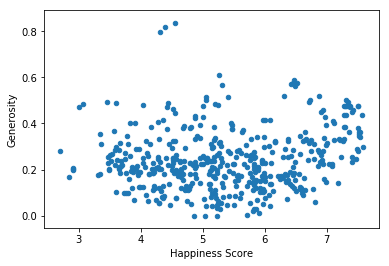

In [234]:
df.plot.scatter(x='Happiness Score', y='Generosity');

In [235]:
dir(df.plot)

['__bytes__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_constructor',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_reset_cache',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

---

# BREAK WITH EXERCISES